In [1]:
from pyexistdb import db
import pandas as pd 
from lxml import etree,objectify
import matplotlib.pyplot as plt
#import xml.etree.ElementTree as etree

In [2]:
exdb = db.ExistDB("http://127.0.0.1:8080/exist", username = "admin", password = "")

In [3]:
file="\"result_text3.xml\""

In [4]:
impf_table = exdb.getDocument("result_text3.xml")

In [5]:
root = etree.fromstring(impf_table)

In [6]:
columns = ["Impfung", "Jahr", "Anzahl"]
dframe = pd.DataFrame(columns = columns)

for child in root:
    impf = child[0].text
    jahr = child[1].text
    anz = child[2].text

    dframe = dframe.append(pd.Series([impf, jahr, anz], index = columns),
                                   ignore_index = True)

In [7]:
dframe

,Impfung,Jahr,Anzahl
0,Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehm...,1995,0
1,Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung,1995,0
2,Diphtherie-Tetanus-Keuchhusten-Kinderlaehmung,1995,0
3,Diphtherie-Tetanus-Keuchhusten-Hib,1995,200
4,Hib (Haemophilus influenzae b),1995,3724
...,...,...,...
589,Grippe,2016,2336
590,H1N1,2016,0
591,Pneumokokken,2016,441
592,Meningokokken,2016,2320


In [8]:
test = exdb.query("for $x in doc("+file+") return $x")
test

In [9]:
root = test.results[0]
root.tag
root.attrib
root.text

'\n'

In [10]:
def QueryToTree(query):
    result = exdb.query("<result>{"+query+"}</result>")
    print(etree.tostring(result.results[0],pretty_print=True).decode())
    return result.results[0]

    XQuery is case-sensitive
    XQuery elements, attributes, and variables must be valid XML names
    An XQuery string value can be in single or double quotes
    An XQuery variable is defined with a $ followed by a name, e.g. $bookstore
    XQuery comments are delimited by (: and :), e.g. (: XQuery Comment :)

In [11]:
QueryToTree("for $x in doc("+file+") return $x")

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <root>
<impf>
                <impfung>Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung-Hepatitis B </impfung>
                <jahr>1995</jahr>
                <anzahl>0</anzahl>
            </impf>
<impf>
                <impfung>Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung</impfung>
                <jahr>1995</jahr>
                <anzahl>0</anzahl>
            </impf>
<impf>
                <impfung>Diphtherie-Tetanus-Keuchhusten-Kinderlaehmung</impfung>
                <jahr>1995</jahr>
                <anzahl>0</anzahl>
            </impf>
<impf>
                <impfung>Diphtherie-Tetanus-Keuchhusten-Hib</impfung>
                <jahr>1995</jahr>
                <anzahl>200</anzahl>
            </impf>
<impf>
                <impfung>Hib (Haemophilus influenzae b)</impfung>
                <jahr>1995</jahr>
                <anzahl>3724</anzahl>
            </impf>
<impf>
                <impfung>Diphthe

<Element result at 0x1b38596e908>

In [12]:
QueryToTree("for $x in doc("+file+")/root/impf where $x/jahr=\"1995\" or $x/jahr = \"2005\" or $x/jahr=\"2015\" order by $x/jahr return $x")

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <impf>
            <impfung>Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung-Hepatitis B </impfung>
            <jahr>1995</jahr>
            <anzahl>0</anzahl>
        </impf>
        <impf>
            <impfung>Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung</impfung>
            <jahr>1995</jahr>
            <anzahl>0</anzahl>
        </impf>
        <impf>
            <impfung>Diphtherie-Tetanus-Keuchhusten-Kinderlaehmung</impfung>
            <jahr>1995</jahr>
            <anzahl>0</anzahl>
        </impf>
        <impf>
            <impfung>Diphtherie-Tetanus-Keuchhusten-Hib</impfung>
            <jahr>1995</jahr>
            <anzahl>200</anzahl>
        </impf>
        <impf>
            <impfung>Hib (Haemophilus influenzae b)</impfung>
            <jahr>1995</jahr>
            <anzahl>3724</anzahl>
        </impf>
        <impf>
            <impfung>Diphtherie-Tetanus-Kinderlaehmung </impfung>
            <

<Element result at 0x1b38597be08>

In [13]:
QueryToTree("for $x in doc("+file+")/root/impf let $impfung := $x/impfung group by $impfung order by sum($x/anzahl) return <impf><impfung>{data($impfung)}</impfung><impfgesamtzahl>{sum($x/anzahl)}</impfgesamtzahl></impf>")

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <impf>
            <impfung>Tetanus</impfung>
            <impfgesamtzahl>0</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Mumps</impfung>
            <impfgesamtzahl>0</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Masern-Mumps</impfung>
            <impfgesamtzahl>0</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Tuberkulose</impfung>
            <impfgesamtzahl>10</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Rotaviren</impfung>
            <impfgesamtzahl>158</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Diphtherie</impfung>
            <impfgesamtzahl>283</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Hib-Hepatitis B </impfung>
            <impfgesamtzahl>747</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>Diphtherie-Tetanus-Keuchhusten-Hib-Kinderlaehmung</impfu

<Element result at 0x1b385988488>

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <impf>
            <impfung>1995</impfung>
            <impfgesamtzahl>43879</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1996</impfung>
            <impfgesamtzahl>47280</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1997</impfung>
            <impfgesamtzahl>46947</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1998</impfung>
            <impfgesamtzahl>47882</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1999</impfung>
            <impfgesamtzahl>50414</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2000</impfung>
            <impfgesamtzahl>45892</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2001</impfung>
            <impfgesamtzahl>39421</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2002</impfung>
            <impfgesamtzahl>40833</impfgesamtzahl>
        </i

<function matplotlib.pyplot.show(*args, **kw)>

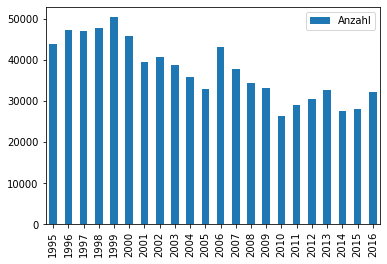

In [14]:
root = QueryToTree("for $x in doc("+file+")/root/impf let $jahr := $x/jahr group by $jahr order by sum($x/jahr) return <impf><impfung>{data($jahr)}</impfung><impfgesamtzahl>{sum($x/anzahl)}</impfgesamtzahl></impf>")

impfungen = [child.getchildren() for child in root.getchildren()]
jahre = [child[0].text for child in impfungen]
anzahl = [int(child[1].text) for child in impfungen]
df = pd.DataFrame(anzahl,jahre, columns=['Anzahl'])
df.plot(kind='bar')
plt.show

In [15]:
QueryToTree("for $x in doc("+file+")/root/impf where $x/impfung = 'Hepatitis A+B' or $x/impfung = 'Hepatitis A' or $x/impfung = 'Hepatitis B' or $x/impfung = 'Grippe' or $x/impfung = 'FSME' or $x/impfung = 'Hepatitis B' let $jahr := $x/jahr group by $jahr order by $jahr return <impf><impfung>{data($jahr)}</impfung><impfgesamtzahl>{sum($x/anzahl)}</impfgesamtzahl></impf>")

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <impf>
            <impfung>1995</impfung>
            <impfgesamtzahl>18682</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1996</impfung>
            <impfgesamtzahl>20819</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1997</impfung>
            <impfgesamtzahl>21252</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1998</impfung>
            <impfgesamtzahl>25057</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1999</impfung>
            <impfgesamtzahl>29578</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2000</impfung>
            <impfgesamtzahl>27874</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2001</impfung>
            <impfgesamtzahl>28715</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2002</impfung>
            <impfgesamtzahl>27615</impfgesamtzahl>
        </i

<Element result at 0x1b386a34548>

In [16]:
QueryToTree("for $x in doc("+file+")/root/impf where $x/impfung = 'Masern-Mumps-Roeteln' or $x/impfung = 'Hib (Haemophilus influenzae b)' or $x/impfung = 'Diphtherie-Tetanus-Keuchhusten' or $x/impfung = 'Kinderlaehmung (Poliomyelitis)' or $x/impfung = 'Hepatitis B' or $x/impfung = 'Rotaviren' or $x/impfung ='Pneumokokken' let $jahr := $x/jahr group by $jahr order by $jahr return <impf><impfung>{data($jahr)}</impfung><impfgesamtzahl>{sum($x/anzahl)}</impfgesamtzahl></impf>")

<result xmlns:exist="http://exist.sourceforge.net/NS/exist">
        <impf>
            <impfung>1995</impfung>
            <impfgesamtzahl>19210</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1996</impfung>
            <impfgesamtzahl>18706</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1997</impfung>
            <impfgesamtzahl>16431</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1998</impfung>
            <impfgesamtzahl>17423</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>1999</impfung>
            <impfgesamtzahl>17865</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2000</impfung>
            <impfgesamtzahl>16712</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2001</impfung>
            <impfgesamtzahl>9757</impfgesamtzahl>
        </impf>
        <impf>
            <impfung>2002</impfung>
            <impfgesamtzahl>10482</impfgesamtzahl>
        </im

<Element result at 0x1b386a6f908>

Beispiel aus Exide

xquery version "3.0" encoding "UTF-8";

<result>{
    for $x in doc("result_text3.xml")/root/impf
    where $x/impfung = 'Masern-Mumps-Roeteln' or $x/impfung = 'Hib (Haemophilus influenzae b)' or $x/impfung = 'Diphtherie-Tetanus-Keuchhusten' or $x/impfung = 'Kinderlaehmung (Poliomyelitis)' or $x/impfung = 'Hepatitis B' or $x/impfung = 'Rotaviren' or $x/impfung ='Pneumokokken'
    let $jahr := $x/jahr
    group by $jahr
    order by $jahr
    return <impf><impfung>{data($jahr)}</impfung><impfgesamtzahl>{sum($x/anzahl)}</impfgesamtzahl></impf>
}
</result>